# Hello, pytorch

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

[PyTrorch](http://pytorch.org/) and [TensorFlow](https://www.tensorflow.org/) are two of the most commonly used deep learning frameworks. Both of these tools are notable for their ability to compute gradients automatically and do operations on GPU, which can be by orders of magnitude faster than running on CPU. Both libraries serve the same purpose, choosing between them is a matter of preference.

In this school, we'll use PyTorch for our practical examples.

We'll start from using the low-level core of PyTorch, and then try out some high-level features.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

print(torch.__version__)

1.8.1+cu101


##We have already know how to deal with numpy arrays:

In [6]:
# numpy world

x = np.arange(16).reshape(4, 4)

print(f"X :\n{             x}")                 # print an array
print(f"X.shape : {        x.shape}")           # print a shape of the array
print(f"add 5 :\n{         x + 5}")             # add an array filled by 5 with same shape
print(f"X^T :\n{           x.T}")               # transpose an matrix
print(f"X*X^T :\n{         x @ x.T}")           # multiply to matrices
print(f"mean over rows :\n{x.mean(axis=-1)}")   # mean over rows
print(f"cumsum of cols :\n{x.cumsum(axis=0)}")  # mean over cols

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
X.shape : (4, 4)
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X^T :
[[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]
X*X^T :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over rows :
[ 1.5  5.5  9.5 13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


##By the way, when we are training a neural network we deal with multy-dimensional arrays called tensors. Matrix is just  particular case of it. One may imagine tensors as a multy-dimensional matrices. 

In [33]:
#Set to tensors (matrices) of size 3 by 2

A = torch.tensor(np.random.rand(6).reshape(3,2), dtype=torch.float32)
B = torch.tensor(np.random.rand(6).reshape(3,2), dtype=torch.float32)

print('shape of A:', A.shape)
print('shape of B:', B.shape)

print('\n A:', A)
print('\n B:', B)

shape of A: torch.Size([3, 2])
shape of B: torch.Size([3, 2])

 A: tensor([[0.9249, 0.7348],
        [0.6324, 0.8005],
        [0.6210, 0.4968]])

 B: tensor([[0.7819, 0.2063],
        [0.4935, 0.9659],
        [0.2668, 0.0433]])


In [43]:
# set a tensor C of zeros with shape of 3 by 2 by 2
C = torch.zeros(size=(3,2,2))
C.shape

torch.Size([3, 2, 2])

In [35]:
# set tensor C be an array of matrices A and B

C[:,:,0] = A
C[:,:,1] = B

print('\n A:',A)
print('\n B:',B)
print('\n C:', C)


 A: tensor([[0.9249, 0.7348],
        [0.6324, 0.8005],
        [0.6210, 0.4968]])

 B: tensor([[0.7819, 0.2063],
        [0.4935, 0.9659],
        [0.2668, 0.0433]])

 C: tensor([[[0.9249, 0.7819],
         [0.7348, 0.2063]],

        [[0.6324, 0.4935],
         [0.8005, 0.9659]],

        [[0.6210, 0.2668],
         [0.4968, 0.0433]]])


## Operations with tensors are almost the same as with numpy arrays:

In [37]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).reshape(4,4).to(torch.float32)

print(f"X :\n{             x}")
print(f"X.shape : {        x.shape}")
print(f"add 5 :\n{         x + 5}")
print(f"X*X^T :\n{         x @ x.T}")
print(f"mean over rows :\n{x.mean(axis=-1)}")
print(f"cumsum of cols :\n{x.cumsum(axis=0)}")

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])
add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over rows :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


# TASK:
# 1. Find A+B
# 2. Find mean of C with respect to each axis

## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. The syntax is in some ways compatible with numpy (as in the example above), [to some extent](https://github.com/pytorch/pytorch/issues/38349).

Though original naming conventions in PyTorch are a bit different, so if you look up documentation to various functions you may notice for example patameter name `dim` instead of `axis`.

Also type conversions need be done explicitly. So operations that cannot be done on current type will raise an error rather than converting the tensor:

In [38]:
x = torch.arange(5)
x.to(float).mean() # instead try: `x.to(float).mean()`

tensor(2., dtype=torch.float64)

In [39]:
x = torch.tensor([1, 2])
x = x.to(float)
x /= 2 # instead try: `x /= 2`
x

tensor([0.5000, 1.0000], dtype=torch.float64)

Converting tensors back to numpy:

In [ ]:
x = torch.ones(size=(3, 5))
x.numpy()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

## Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


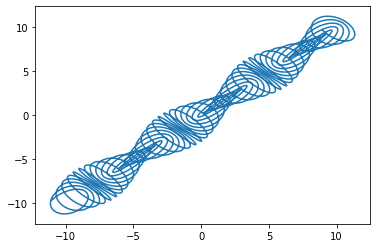

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x=x(t) and y=y(t) as defined above
# your code here


plt.plot(x.numpy(), y.numpy());

--------

# Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * __```torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)```__
* Define some differentiable `y = arbitrary_function(x)`
* Call `y.backward()`
* Gradients are now available as ```x.grad```

__Here's a few examples:__

In [ ]:
x = torch.tensor(0., requires_grad=True)
y = torch.sin(x)
y.backward()
x.grad

tensor(1.)

In [ ]:
# Remember we defined MSE loss with its gradient last week?
# With torch we could've skipped the gradient part:

def MSELoss(y, yhat):
    return ((y - yhat)**2).mean()

y = torch.normal(0., 1., size=(100,))
yhat = torch.normal(0., 1., size=(100,), requires_grad=True)

loss = MSELoss(y, yhat)
loss.backward()

print("Checking autograd result equals to analytical derivative.")
print("    check result:", torch.allclose(yhat.grad, 2 * (yhat - y) / y.shape[0]))

Checking autograd result equals to analytical derivative.
    check result: True


__Note:__ calling `backward` multiple times accumulates the sum of gradients:

In [ ]:
x = torch.tensor(0., requires_grad=True)
y1 = torch.sin(x)
y2 = torch.sin(x)

print("x.grad =", x.grad)
y1.backward()
print("x.grad =", x.grad)
y2.backward()
print("x.grad =", x.grad)

x.grad = None
x.grad = tensor(1.)
x.grad = tensor(2.)


so typically when using it inside learning loop you want to zero the accumulated gradients between the consequtive `backward()` calls, e.g.:

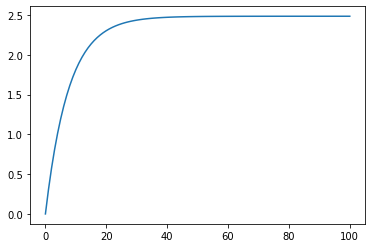

In [ ]:
# Generate linear data:
x = torch.tensor(np.random.uniform(-3, 5, 100), dtype=torch.float32)
y = 2.5 * x + torch.normal(mean=0., std=0.4, size=x.shape)

w = torch.tensor(0., dtype=torch.float32, requires_grad=True)
w_values_history = [
    w.item() # this returns a python number with the value of the tensor
]

for _ in range(100):
    loss = MSELoss(y, w * x)
    loss.backward()
    with torch.no_grad(): #  = "don't calculate gradients in the block below"
        w -= 0.01 * w.grad

    w.grad.zero_() # just for the lulz try commenting this out
    w_values_history.append(w.item())

plt.plot(w_values_history);

Calling `backward()` for a tensor:

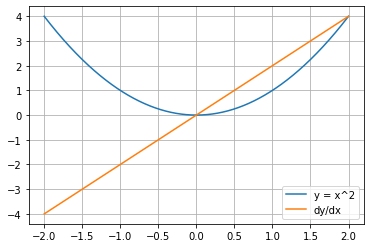

In [ ]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x**2

# Note: since `x` and `y` are both vectors, the derivative is
# defined in the form of Jacobian dy/dx.
# For such cases `backward()` is implemented to calculate
# the Jacobian multiplied by some other vector that you
# have to provide as an argument e.g. `y.backward(some_vector)` -
# this will return Jacobian dy/dx times `some_vector`.

# Since our Jacobian is diagonal, the following code will return
# per-element derivative values:
y.backward(torch.ones_like(y))

plt.plot(x.detach(), y.detach(), label='y = x^2')
plt.plot(x.detach(), x.grad, label="dy/dx")
plt.legend();
plt.grid(True);

Second derivative example:

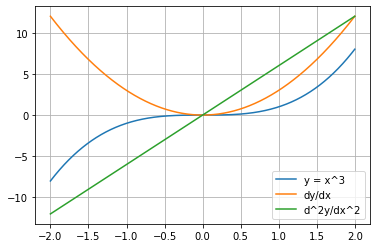

In [ ]:
x = torch.linspace(-2, 2, 1000, requires_grad=True)
y = x**3

first_derivative, = torch.autograd.grad(
    y, x, torch.ones_like(y),
    create_graph=True # "create_graph" required to be able to calculate derivative of the derivative later
)
second_derivative, = torch.autograd.grad(first_derivative, x, torch.ones_like(first_derivative))

plt.plot(x.detach(), y.detach(), label='y = x^3')
plt.plot(x.detach(), first_derivative.detach(), label="dy/dx")
plt.plot(x.detach(), second_derivative, label="d^2y/dx^2")
plt.legend();
plt.grid(True);